<a href="https://colab.research.google.com/github/Felipe-Oliveira11/TensorFlow-Normalization/blob/master/TensorFlow_Normalizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalMaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LayerNormalization 
from tensorflow.keras.layers import BatchNormalization 


import time 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

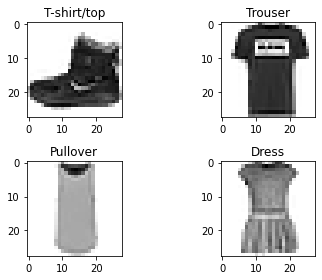

In [4]:
for image in range(0,4):
  plt.subplot(2,2, image + 1)
  plt.imshow(X_train[image], cmap=plt.cm.binary)
  plt.title(class_names[image])
  plt.grid(False)
plt.tight_layout()
plt.show()

In [5]:
# tipo de dados 
X_train = np.array(X_train, dtype='float64')
X_test = np.array(X_test, dtype='float64')


# padronização 
X_train = X_train / 255.0
X_test = X_test / 255.0


# image shape
image_rows = 28
image_cols = 28
image_shape = (image_rows, image_cols,1)

# Reshape | (28,28,1)
X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_test = X_test.reshape(X_test.shape[0], image_rows, image_cols, 1)

print('Image shape: {}'.format(X_train.shape))

Image shape: (60000, 28, 28, 1)


<br>
<br>

<br>
<br>


### Arquitetura Funcional de CNN 

Paradigma de construção utilizando <b>Model</b> de forma funcional.

<br>
<hr>
<br>

In [6]:
# parâmetros 
batch_size = 64
epochs = 30
optimizer = Adam(learning_rate=0.001)

In [7]:
# Convolutional Neural Network  API funcional

input = Input(shape=image_shape)
model = Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu')(input)
model = MaxPool2D(pool_size=(2,2), strides=(1,1))(model)
model = Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu')(model)
model = MaxPool2D(pool_size=(2,2), strides=(1,1))(model)
model = GlobalMaxPool2D()(model)
model = Dense(128, activation='relu')(model)
output = Dense(10, activation='softmax')(model)


model = Model(inputs=input, outputs=output)

In [8]:
%%time 

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss',
                               mode='min',
                               min_delta=0.001,
                               patience=5
                               )


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.20,
          callbacks=[early_stopping])

Epoch 1/30
750/750 [==============================] - 157s 210ms/step - loss: 0.8800 - accuracy: 0.6913 - val_loss: 0.5938 - val_accuracy: 0.7907
Epoch 2/30
750/750 [==============================] - 152s 203ms/step - loss: 0.5226 - accuracy: 0.8143 - val_loss: 0.4831 - val_accuracy: 0.8290
Epoch 3/30
750/750 [==============================] - 152s 203ms/step - loss: 0.4527 - accuracy: 0.8381 - val_loss: 0.4359 - val_accuracy: 0.8426
Epoch 4/30
750/750 [==============================] - 155s 206ms/step - loss: 0.4075 - accuracy: 0.8530 - val_loss: 0.4092 - val_accuracy: 0.8557
Epoch 5/30
750/750 [==============================] - 151s 201ms/step - loss: 0.3805 - accuracy: 0.8626 - val_loss: 0.3878 - val_accuracy: 0.8614
Epoch 6/30
750/750 [==============================] - 150s 200ms/step - loss: 0.3577 - accuracy: 0.8708 - val_loss: 0.3732 - val_accuracy: 0.8663
Epoch 7/30
750/750 [==============================] - 150s 200ms/step - loss: 0.3411 - accuracy: 0.8757 - val_loss: 0.3493 -

In [9]:
# métricas -> compile 
model.metrics_names

['loss', 'accuracy']

<br>
<br>
<hr>
<br>



### BatchNormalization 

Uma técnica de normalização em lotes aplicada a mini-lotes de dados.







<br>
<br>

In [10]:
# CNN BatchNormalization 

model = Sequential()
model.add(Input(shape=image_shape))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization()) # Batch 1 
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization()) # Batch 2 
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.40))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization()) # Batch 3 
model.add(GlobalMaxPool2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
%%time 

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.20,
          callbacks=[early_stopping])

Epoch 1/5
750/750 [==============================] - 137s 183ms/step - loss: 0.4437 - accuracy: 0.8372 - val_loss: 0.3359 - val_accuracy: 0.8712
Epoch 2/5
750/750 [==============================] - 134s 179ms/step - loss: 0.2848 - accuracy: 0.8952 - val_loss: 0.2811 - val_accuracy: 0.8987
Epoch 3/5
750/750 [==============================] - 135s 180ms/step - loss: 0.2460 - accuracy: 0.9105 - val_loss: 0.2371 - val_accuracy: 0.9120
Epoch 4/5
750/750 [==============================] - 137s 183ms/step - loss: 0.2188 - accuracy: 0.9198 - val_loss: 0.2896 - val_accuracy: 0.8989
Epoch 5/5
750/750 [==============================] - 133s 178ms/step - loss: 0.2001 - accuracy: 0.9260 - val_loss: 0.2348 - val_accuracy: 0.9162
CPU times: user 19min 38s, sys: 39.5 s, total: 20min 18s
Wall time: 11min 19s


In [12]:
model.evaluate(X_test, y_test, batch_size=batch_size)

157/157 [==============================] - 6s 39ms/step - loss: 0.2450 - accuracy: 0.9109


[0.2449817657470703, 0.9108999967575073]

In [13]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.92      0.76      0.83      1000
           3       0.91      0.93      0.92      1000
           4       0.78      0.92      0.84      1000
           5       0.98      0.99      0.98      1000
           6       0.79      0.70      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<br>
<hr>
<br>
<br>



### LayerNormalization 

Camada de normalizção que aplica normalização por camada difrente de mini-lotes é uma abordagem que usa estatísticas independentes do mini-lote. 

LayerNormalization não introduz dependências, pois calcula-se as estatísticas de normalização da camada em todas as unidades ocultas na mesma camada.


Diferente da BatchNormalization, a LayerNormalization não impõe nenhuma restrição ao tamanho do mini-lote 







<br>
<br>

In [14]:
from tensorflow.keras.layers import LayerNormalization

In [15]:
# CNN com LayerNormalzation (3 camadas)

model = Sequential()
model.add(Input(shape=image_shape))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(LayerNormalization()) # LayerNormalization 1 
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(LayerNormalization()) # LayerNormalization 2
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.40))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(LayerNormalization()) # LayerNormalization 3
model.add(GlobalMaxPool2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
%%time 
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.20,
          callbacks=[early_stopping])

Epoch 1/5
750/750 [==============================] - 144s 192ms/step - loss: 0.5665 - accuracy: 0.7875 - val_loss: 0.3538 - val_accuracy: 0.8682
Epoch 2/5
750/750 [==============================] - 142s 189ms/step - loss: 0.3347 - accuracy: 0.8756 - val_loss: 0.2920 - val_accuracy: 0.8884
Epoch 3/5
750/750 [==============================] - 142s 189ms/step - loss: 0.2820 - accuracy: 0.8950 - val_loss: 0.2724 - val_accuracy: 0.8993
Epoch 4/5
750/750 [==============================] - 141s 188ms/step - loss: 0.2519 - accuracy: 0.9062 - val_loss: 0.2438 - val_accuracy: 0.9113
Epoch 5/5
750/750 [==============================] - 142s 190ms/step - loss: 0.2308 - accuracy: 0.9146 - val_loss: 0.2382 - val_accuracy: 0.9146
CPU times: user 20min 38s, sys: 44.7 s, total: 21min 23s
Wall time: 11min 54s


In [17]:
model.evaluate(X_test, y_test, batch_size=batch_size)

157/157 [==============================] - 7s 44ms/step - loss: 0.2494 - accuracy: 0.9118


[0.24942593276500702, 0.9118000268936157]

In [18]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.83      0.91      0.87      1000
           3       0.90      0.91      0.91      1000
           4       0.85      0.86      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.77      0.70      0.73      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<br>
<hr>
<br>
<br>


### WeightNormalization 
<br>

é um método desenvolvido pelo Open AI que, em vez de normalizar o mini-lote, normaliza os pesos da camada. A normalização de peso reparameteriza os pesos de qualquer camada na rede neural



<br>

In [28]:
import tensorflow_addons as tfa

In [35]:
# CNN com WeightNormalization 

model = Sequential()
model.add(Input(shape=image_shape))
model.add(tfa.layers.WeightNormalization(Conv2D(32, (3,3), padding='same', activation='relu'))) # WeightNormalization 1 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tfa.layers.WeightNormalization(Conv2D(64, (3,3), padding='same', activation='relu'))) # WeightNormalization 2
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.40))
model.add(tfa.layers.WeightNormalization(Conv2D(256, (3,3), padding='same', activation='relu'))) # WeightNormalization 3
model.add(GlobalMaxPool2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [36]:
%%time 
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.20,
          callbacks=[early_stopping])

Epoch 1/5
750/750 [==============================] - 137s 183ms/step - loss: 0.9214 - accuracy: 0.6602 - val_loss: 0.5409 - val_accuracy: 0.8108
Epoch 2/5
750/750 [==============================] - 135s 180ms/step - loss: 0.6081 - accuracy: 0.7732 - val_loss: 0.4982 - val_accuracy: 0.8212
Epoch 3/5
750/750 [==============================] - 140s 186ms/step - loss: 0.5469 - accuracy: 0.7983 - val_loss: 0.4491 - val_accuracy: 0.8407
Epoch 4/5
750/750 [==============================] - 139s 185ms/step - loss: 0.5049 - accuracy: 0.8119 - val_loss: 0.4317 - val_accuracy: 0.8428
Epoch 5/5
750/750 [==============================] - 133s 177ms/step - loss: 0.4749 - accuracy: 0.8232 - val_loss: 0.4244 - val_accuracy: 0.8487
CPU times: user 18min 45s, sys: 1min 12s, total: 19min 57s
Wall time: 11min 26s


In [37]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76      1000
           1       0.98      0.97      0.98      1000
           2       0.86      0.64      0.73      1000
           3       0.92      0.83      0.87      1000
           4       0.79      0.68      0.73      1000
           5       0.98      0.92      0.95      1000
           6       0.46      0.77      0.58      1000
           7       0.90      0.96      0.93      1000
           8       0.97      0.95      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.87      0.84      0.85     10000
weighted avg       0.87      0.84      0.85     10000



<br>
<hr>
<br>



### GroupNormalization 




<br>

In [38]:
import tensorflow_addons as tfa

In [46]:
tfa.layers.GroupNormalization(groups=8, axis=3)

In [47]:
# CNN com GroupNormalization 

model = Sequential()
model.add(Input(shape=image_shape))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tfa.layers.GroupNormalization(groups=8, axis=3)) # GroupNormalization 1 
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tfa.layers.GroupNormalization(groups=8, axis=3)) # GroupNormalization 2
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.40))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tfa.layers.GroupNormalization(groups=8, axis=3)) # GroupNormalization 3
model.add(GlobalMaxPool2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [40]:
%%time 
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_split=0.20,
          callbacks=[early_stopping])

Epoch 1/5
750/750 [==============================] - 150s 200ms/step - loss: 0.5098 - accuracy: 0.8104 - val_loss: 0.3491 - val_accuracy: 0.8712
Epoch 2/5
750/750 [==============================] - 154s 205ms/step - loss: 0.3065 - accuracy: 0.8866 - val_loss: 0.2948 - val_accuracy: 0.8878
Epoch 3/5
750/750 [==============================] - 157s 209ms/step - loss: 0.2640 - accuracy: 0.9014 - val_loss: 0.2861 - val_accuracy: 0.8918
Epoch 4/5
750/750 [==============================] - 150s 200ms/step - loss: 0.2373 - accuracy: 0.9114 - val_loss: 0.2575 - val_accuracy: 0.9052
Epoch 5/5
750/750 [==============================] - 159s 212ms/step - loss: 0.2170 - accuracy: 0.9197 - val_loss: 0.2321 - val_accuracy: 0.9208
CPU times: user 20min 14s, sys: 1min 58s, total: 22min 12s
Wall time: 12min 51s


In [41]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.85      0.86      1000
           3       0.90      0.93      0.92      1000
           4       0.87      0.84      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.74      0.75      0.75      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<br>
<hr>
<br>

### Instance Normalization


<br>

In [42]:
import tensorflow_addons as tfa 

In [43]:
tfa.layers.InstanceNormalization()

In [ ]:
model = Sequential()
model.add(Input(shape=image_shape))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tfa.layers.InstanceNormalization(axis=3, gamma_initializer="random_uniform")) # InstanceNormalization 1 
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tfa.layers.InstanceNormalization(axis=3, gamma_initializer="random_uniform")) # InstanceNormalization 2
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(SpatialDropout2D(0.40))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tfa.layers.InstanceNormalization(axis=3, gamma_initializer="random_uniform") # InstanceNormalization 3
model.add(GlobalMaxPool2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [44]:
%%time 
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.20,
          callbacks=[early_stopping])

Epoch 1/5
750/750 [==============================] - 150s 200ms/step - loss: 0.1986 - accuracy: 0.9263 - val_loss: 0.2309 - val_accuracy: 0.9183
Epoch 2/5
750/750 [==============================] - 152s 203ms/step - loss: 0.1869 - accuracy: 0.9305 - val_loss: 0.2278 - val_accuracy: 0.9209
Epoch 3/5
750/750 [==============================] - 150s 200ms/step - loss: 0.1717 - accuracy: 0.9365 - val_loss: 0.2271 - val_accuracy: 0.9221
Epoch 4/5
750/750 [==============================] - 149s 199ms/step - loss: 0.1600 - accuracy: 0.9407 - val_loss: 0.2329 - val_accuracy: 0.9208
Epoch 5/5
750/750 [==============================] - 149s 199ms/step - loss: 0.1530 - accuracy: 0.9419 - val_loss: 0.2312 - val_accuracy: 0.9213
CPU times: user 21min 11s, sys: 51.6 s, total: 22min 3s
Wall time: 12min 33s


In [45]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.79      0.94      0.86      1000
           3       0.92      0.93      0.92      1000
           4       0.89      0.85      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.83      0.67      0.74      1000
           7       0.97      0.97      0.97      1000
           8       0.96      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

